# **Chapter Seven**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Step 1. Load dataset**

In [ ]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/Chapter 3/Image Classification/train/'
test_dir = '/content/drive/MyDrive/Colab Notebooks/Chapter 3/Image Classification/test/'
validate_dir = '/content/drive/MyDrive/Colab Notebooks/Chapter 3/Image Classification/validate/'

# **Step 2. Create a dataset**

In [ ]:
import numpy as np

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

In [ ]:
from tensorflow.keras import layers

In [ ]:
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

In [ ]:
from keras.models import Model, load_model

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    batch_size=64,
    image_size=(32, 32),
    seed=123,
    validation_split=0.2,
    subset="training"
)

Found 44871 files belonging to 6 classes.
Using 35897 files for training.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    batch_size=64,
    image_size=(32, 32),
    seed=None,
    validation_split=None,
    subset=None
)

Found 1687 files belonging to 6 classes.


In [ ]:
validate_ds = tf.keras.utils.image_dataset_from_directory(
    validate_dir,
    batch_size=64,
    image_size=(32, 32),
    seed=123,
    validation_split=0.2,
    subset="validation"
)

Found 9542 files belonging to 6 classes.
Using 1908 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Decks_Cracked', 'Decks_Non-cracked', 'Pavements_Cracked', 'Pavements_Non-cracked', 'Walls_Cracked', 'Walls_Non-cracked']


# **Step 3. Configure the dataset for performance**

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validate_ds = validate_ds.cache().prefetch(buffer_size=AUTOTUNE)

# **Step 4. Standardize the data**

In [ ]:
normalization_layer = layers.Rescaling(1./255)

# **Step 5. Keras model**

# **5.1 Create the model**

In [ ]:
import matplotlib.pyplot as plt

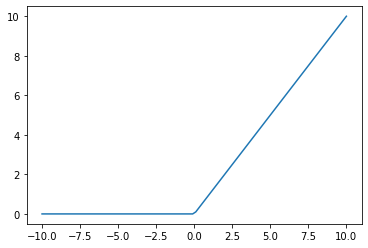

In [ ]:
sample_x = np.linspace(-10,10,100)
sample_y = np.maximum(0,sample_x)

plt.plot(sample_x,sample_y)

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(32, 32, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# **5.2 Compile the model**


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# **5.3 Model summary**

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 64)         

# **5.4 Train the model**

In [ ]:
epochs=100
history = model.fit(
  train_ds,
  validation_data=validate_ds,
  epochs=epochs
)

Epoch 1/100
561/561 [==============================] - 110s 91ms/step - loss: 0.9996 - accuracy: 0.6321 - val_loss: 0.8218 - val_accuracy: 0.7144
Epoch 2/100
561/561 [==============================] - 43s 76ms/step - loss: 0.8078 - accuracy: 0.7166 - val_loss: 0.8008 - val_accuracy: 0.7227
Epoch 3/100
561/561 [==============================] - 43s 77ms/step - loss: 0.7319 - accuracy: 0.7398 - val_loss: 0.7222 - val_accuracy: 0.7510
Epoch 4/100
561/561 [==============================] - 43s 77ms/step - loss: 0.6891 - accuracy: 0.7537 - val_loss: 0.6384 - val_accuracy: 0.7689
Epoch 5/100
561/561 [==============================] - 43s 77ms/step - loss: 0.6666 - accuracy: 0.7606 - val_loss: 0.6788 - val_accuracy: 0.7516
Epoch 6/100
561/561 [==============================] - 43s 76ms/step - loss: 0.6451 - accuracy: 0.7675 - val_loss: 0.6484 - val_accuracy: 0.7636
Epoch 7/100
561/561 [==============================] - 43s 76ms/step - loss: 0.6263 - accuracy: 0.7722 - val_loss: 0.6025 - val_a

# **5.5 Visualize training results**

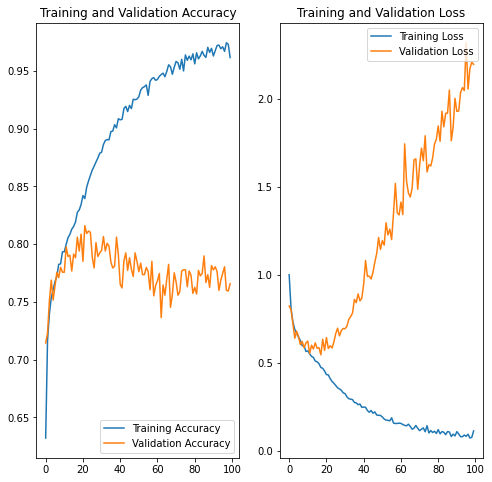

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **Step 6. Overfitting**

# **6.1 Data augmentation**

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(32, 32, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

# **6.2 Dropout**

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

# **6.3 Compile the model**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# **6.4 Model summary**

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 rescaling_6 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                 

# **6.5 Train the model**

In [ ]:
epochs = 150
history = model.fit(
  train_ds,
  validation_data=validate_ds,
  epochs=epochs
)

Epoch 1/150
561/561 [==============================] - 54s 95ms/step - loss: 0.8735 - accuracy: 0.6858 - val_loss: 1.0358 - val_accuracy: 0.6316
Epoch 2/150
561/561 [==============================] - 50s 90ms/step - loss: 0.8154 - accuracy: 0.7055 - val_loss: 1.0093 - val_accuracy: 0.6405
Epoch 3/150
561/561 [==============================] - 50s 89ms/step - loss: 0.7887 - accuracy: 0.7147 - val_loss: 1.0125 - val_accuracy: 0.6504
Epoch 4/150
561/561 [==============================] - 50s 89ms/step - loss: 0.7618 - accuracy: 0.7234 - val_loss: 0.9437 - val_accuracy: 0.6782
Epoch 5/150
561/561 [==============================] - 49s 88ms/step - loss: 0.7476 - accuracy: 0.7276 - val_loss: 0.7772 - val_accuracy: 0.7196
Epoch 6/150
561/561 [==============================] - 49s 88ms/step - loss: 0.7395 - accuracy: 0.7290 - val_loss: 0.9138 - val_accuracy: 0.6771
Epoch 7/150
561/561 [==============================] - 49s 88ms/step - loss: 0.7329 - accuracy: 0.7318 - val_loss: 0.8706 - val_ac

# **6.6 Visualize training results**

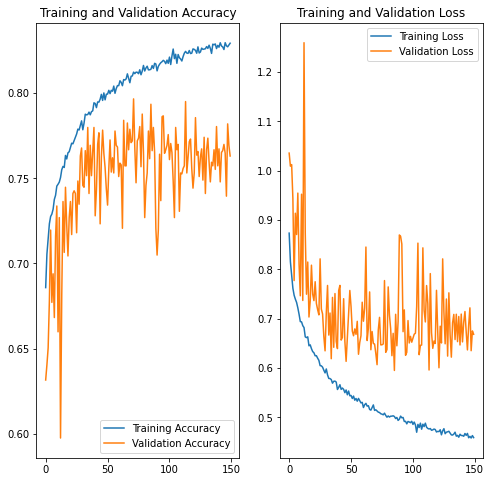

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()